# Car Insurance Claims

#### Problem Statement: This Mahcine Learning model is used to check which insured client will request for the car damages incurred after the collision or an accident.

#### Aim: To help the insurance companies whether or not issue the insurnace to the customers depending on the damages with the situation to make more profit.

In [1]:
#Importing the required Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# As we see in the class we use this line of the code in order to show the figures inline.
%matplotlib inline 

# Set default font size
plt.rcParams['font.size'] = 15


In [2]:
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the Dataset
data = pd.read_csv('/Users/omkarnevagi/Documents/Python/Endtoendml/Carinsuranceclaims/Car_Insurance_Claim.csv')

### Data Analysis

In [4]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [7]:
data.shape

(10000, 19)

##### Dataset Observation

1. Dataset has total of 10000 rows and 19 colums.
2. Outcome is the target variable where the customer claimed the Insurance. It has two values 1 and 0 which corresponds to "Yes" or "No" respectively.

### Data Preprocessing

In [8]:
#Check the null values
data.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [9]:
#To check the duplicate values
data[data.duplicated()].sum()

ID                     0.0
AGE                    0.0
GENDER                 0.0
RACE                   0.0
DRIVING_EXPERIENCE     0.0
EDUCATION              0.0
INCOME                 0.0
CREDIT_SCORE           0.0
VEHICLE_OWNERSHIP      0.0
VEHICLE_YEAR           0.0
MARRIED                0.0
CHILDREN               0.0
POSTAL_CODE            0.0
ANNUAL_MILEAGE         0.0
VEHICLE_TYPE           0.0
SPEEDING_VIOLATIONS    0.0
DUIS                   0.0
PAST_ACCIDENTS         0.0
OUTCOME                0.0
dtype: float64

<AxesSubplot:xlabel='CREDIT_SCORE'>

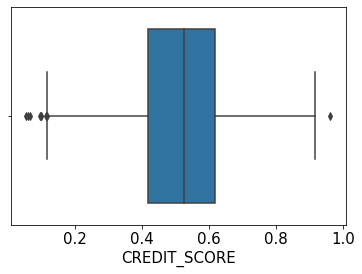

In [10]:
sns.boxplot(data.CREDIT_SCORE)

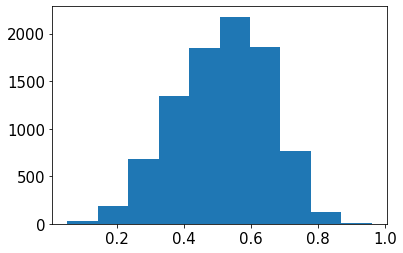

In [11]:
plt.hist(data.CREDIT_SCORE)
plt.show()

In [12]:
#Since no much outliers are present in the credit score column.Hence it is being repalced with mean
data['CREDIT_SCORE'] = data['CREDIT_SCORE'].fillna(data['CREDIT_SCORE'].mean())

<AxesSubplot:xlabel='ANNUAL_MILEAGE'>

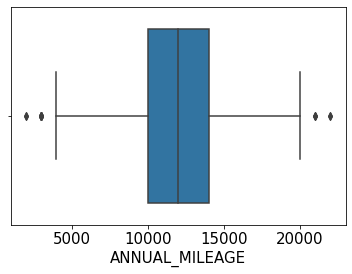

In [13]:
sns.boxplot(data.ANNUAL_MILEAGE)

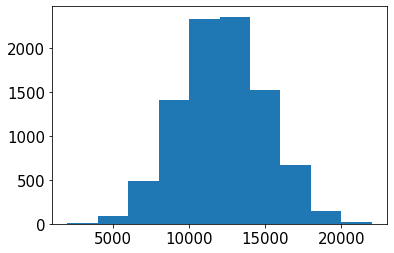

In [14]:
plt.hist(data.ANNUAL_MILEAGE)
plt.show()

In [15]:
data['ANNUAL_MILEAGE'] = data['ANNUAL_MILEAGE'].fillna(data['ANNUAL_MILEAGE'].mean())

In [16]:
#Null values have been imputed with mean for both the columns.
data.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

The column 'ID' has unique data and hence it can dropped

In [17]:
data.drop('ID', axis = 1, inplace = True)

In [18]:
data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


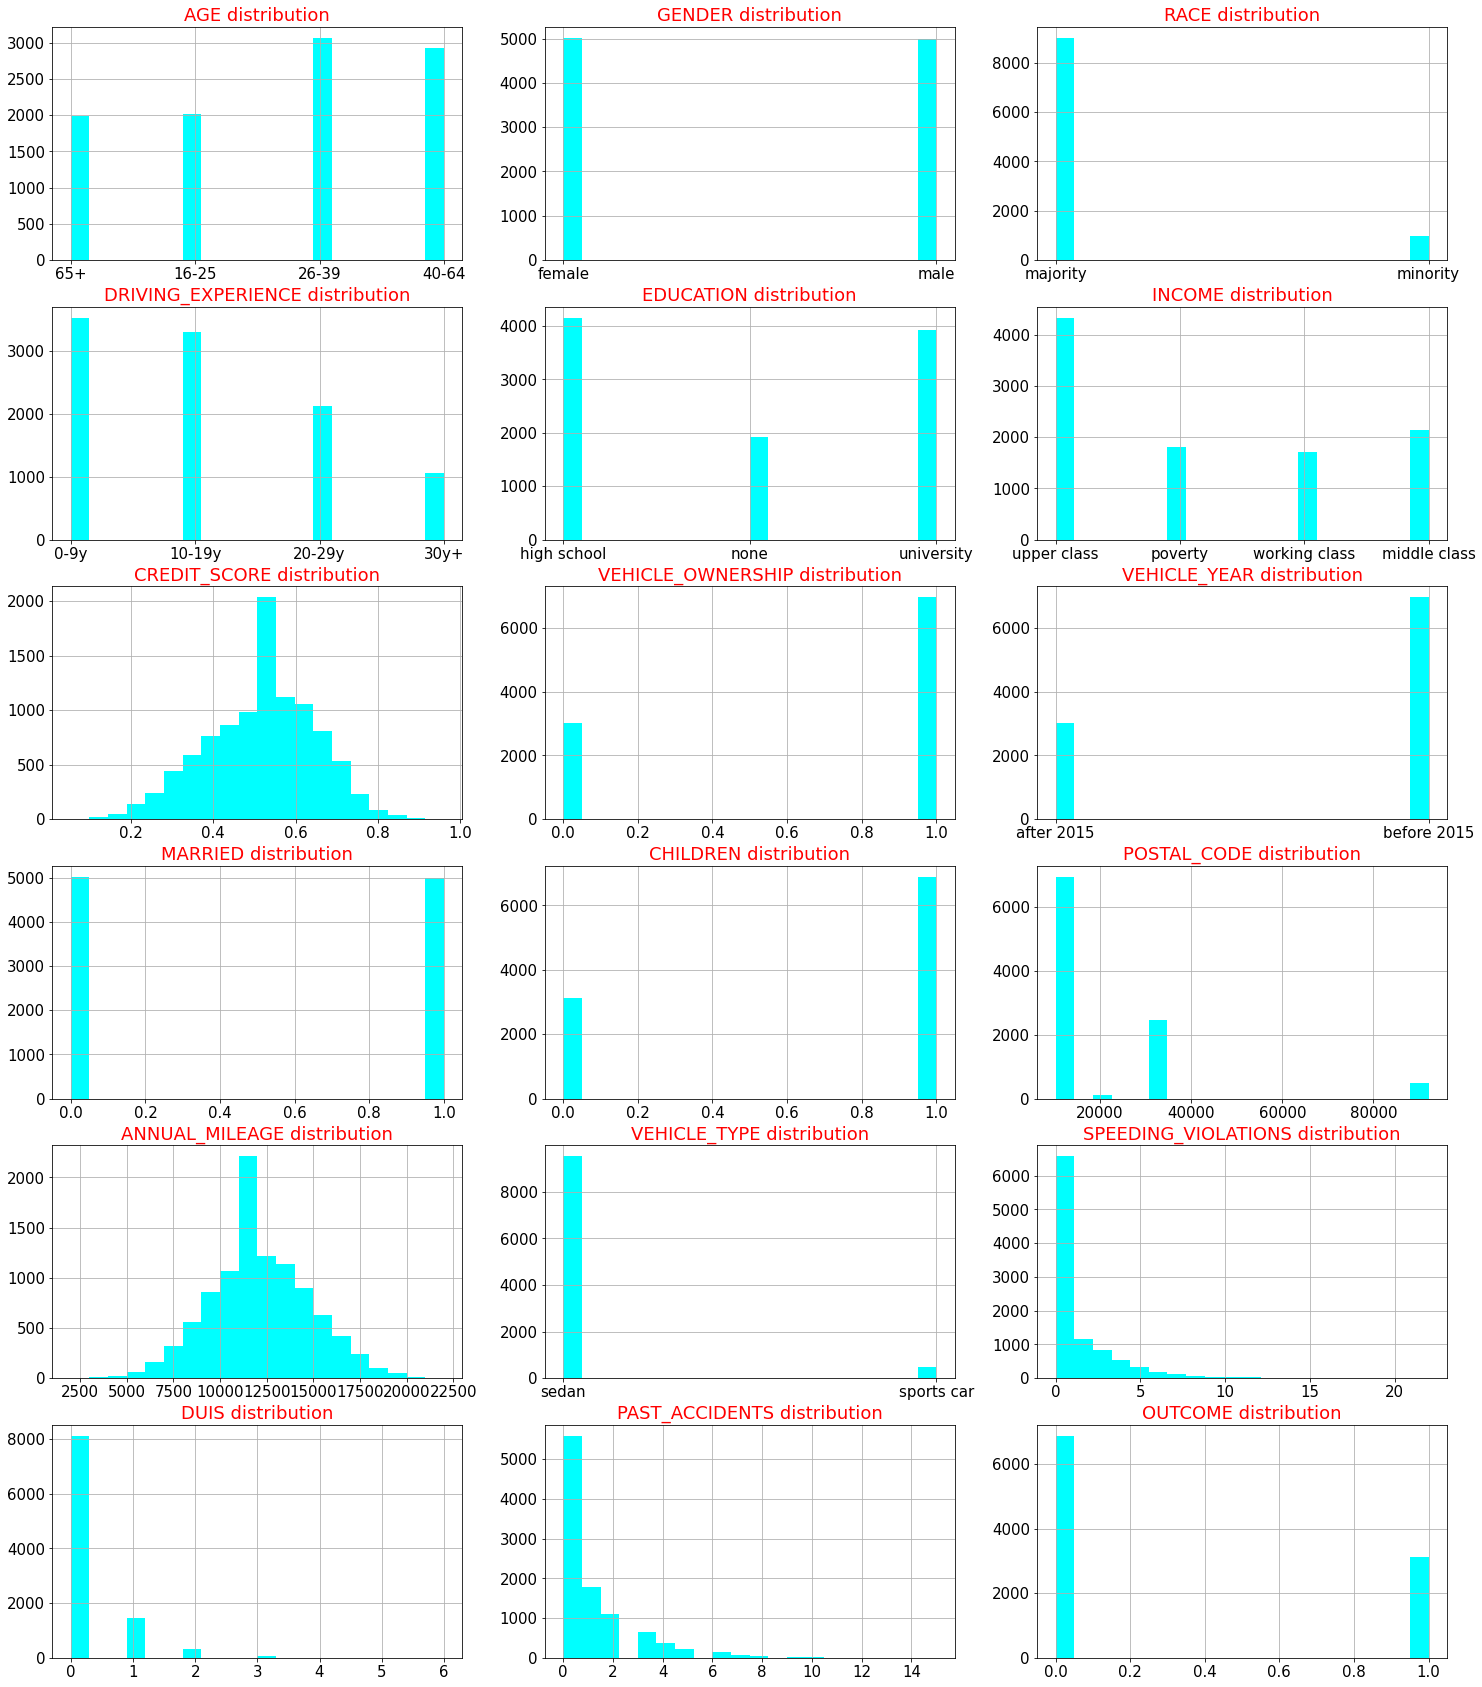

In [19]:
# Data Distribution
 
fig = plt.figure(figsize = (25,30))

for index, column in enumerate(data.columns):
    ax = fig.add_subplot(6, 3, index+1)
    data[column].hist(bins = 20, ax=ax, facecolor = 'Aqua')
    ax.set_title(column + " distribution",color = 'Red')

plt.show()

In [20]:
data.dtypes

AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [21]:
#Copy all the columns with Categorical Data Types.
cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
cat_cols

['AGE',
 'GENDER',
 'RACE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_YEAR',
 'VEHICLE_TYPE']

In [22]:
#Copy all the columns with Numerical Data Types.
num_cols = [col for col in data.columns if data[col].dtypes != "O"]
num_cols

['CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

1. Credit score and Annual Mileage is distributed normally.
2. Vehicle Distribution and Race are imbalanced.
3. Past accidents and Speeding violations are positively skewed.

In [23]:
#Relationship of few independent variables with dependent variable.

def countplot_with_target(data, columns, n_cols= 2):
  """
    Args:
      - data: the input dataframe
      - column: the column name in `data` to be counted w.r.t `target`
    Return:
      - None
  """
  fig, axes = plt.subplots(1, n_cols, figsize=(17,9))

  for index,column in enumerate(columns): 
      
      ax = sns.countplot(
          x='OUTCOME',
          hue=column ,
          ax=axes[index],
          data=data,
          palette = 'pastel',
          saturation = 3
          )
      
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
      for p in ax.patches:
        percentage = (p.get_height()/len(data)*100).round(1)
        txt = str(percentage)+'%'
        txt_x = p.get_x() 
        txt_y = p.get_height() + 30
        ax.text(txt_x,txt_y,txt)

  fig.tight_layout(pad=1.5)

#### Age and Gender Distribution

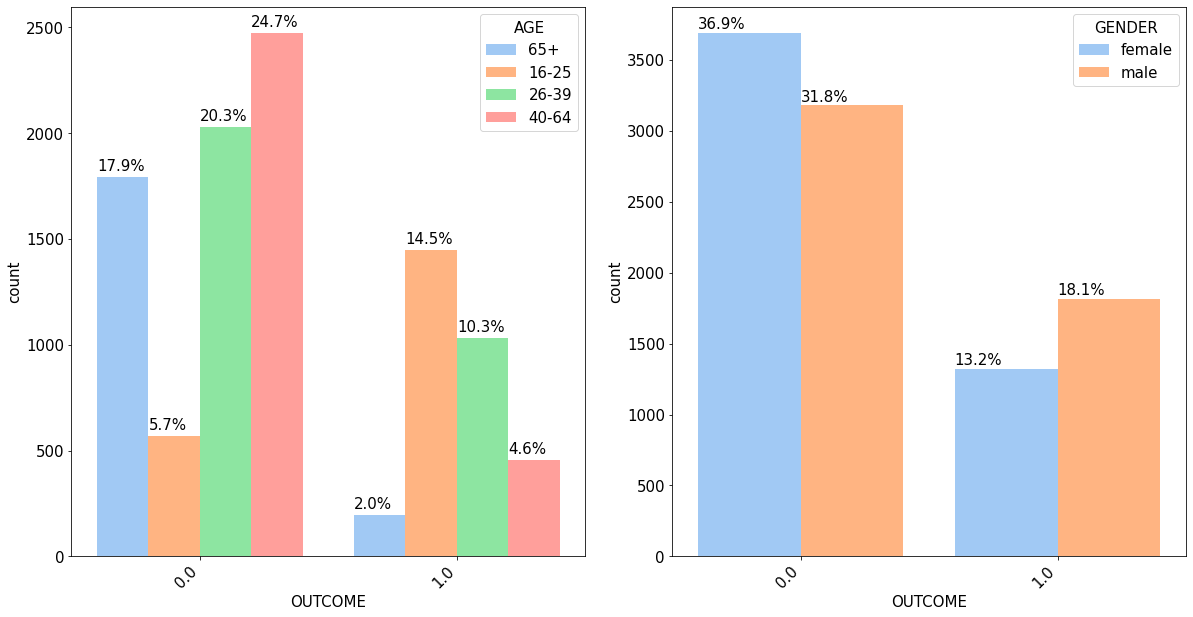

In [24]:
countplot_with_target(data, cat_cols[0:2])

1. People with Age '16-25' have claimed more insurance.
2. Male have claimed more insurance when comapred to female.

#### Driving Experience and Education

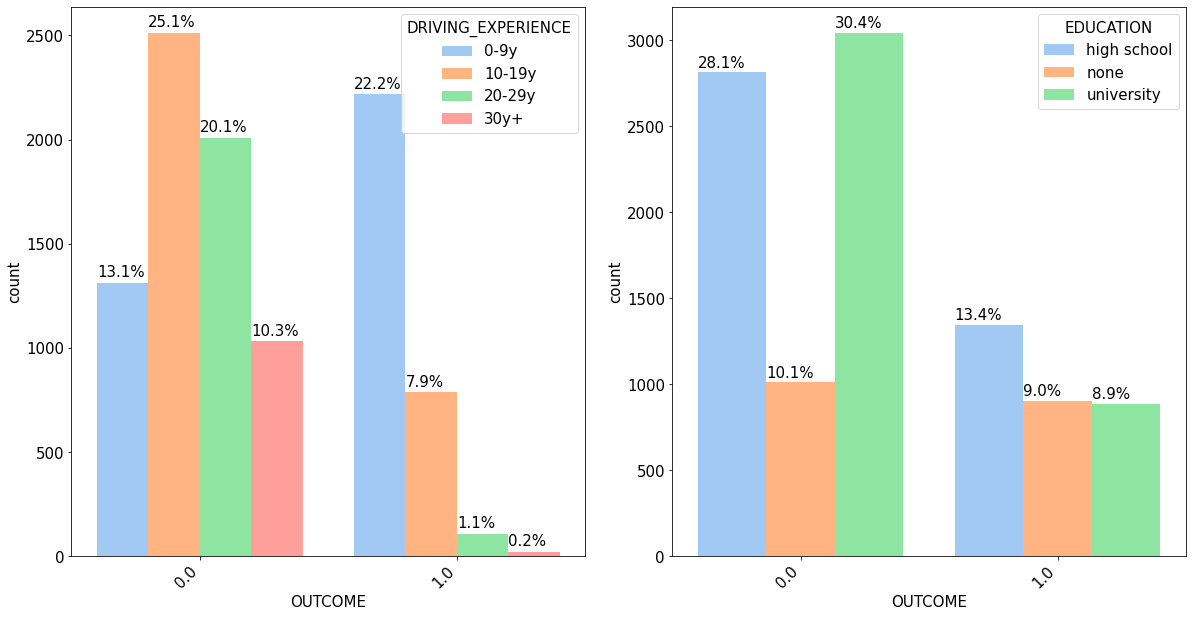

In [25]:
countplot_with_target(data, cat_cols[3:5])

1. People with 0-9 years of driving experience have claimed more insurance.
2. People with 30+ years of driving experience have claimed very less.
3. People with high school level education have claimed more when comapred to university.

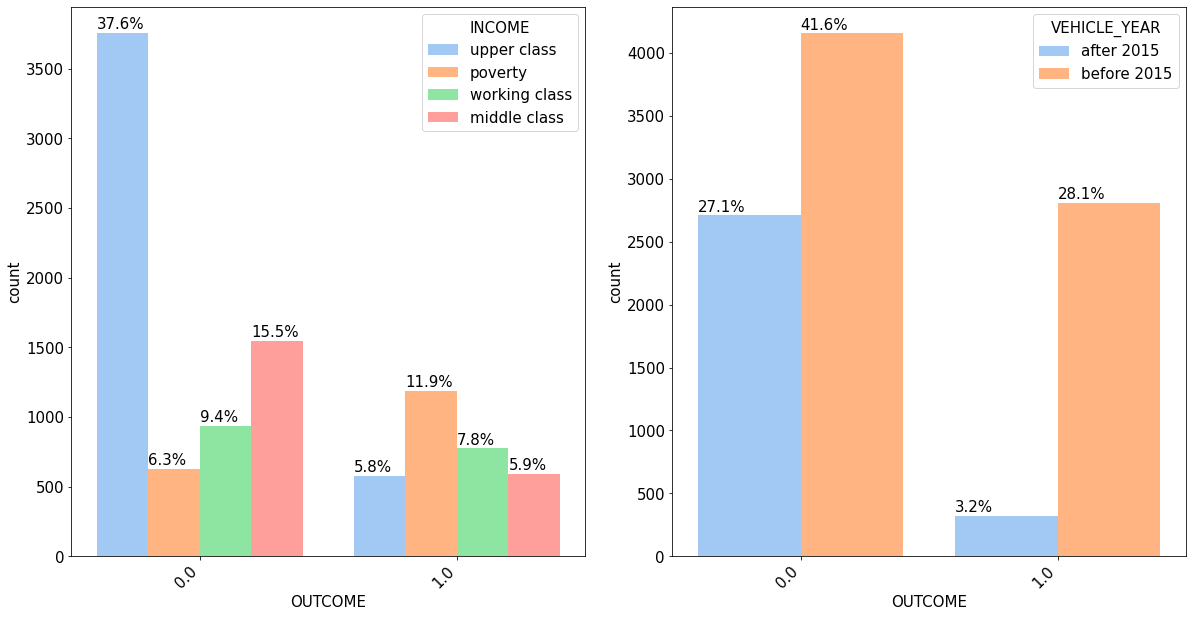

In [26]:
countplot_with_target(data, cat_cols[5:-1])

1. People who are in poverty have claimed more insurance.
2. After the year 2015, people have started claiming less insurance.

In [27]:
#Filtering the columns with binary values.
bin_num_cols = ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']

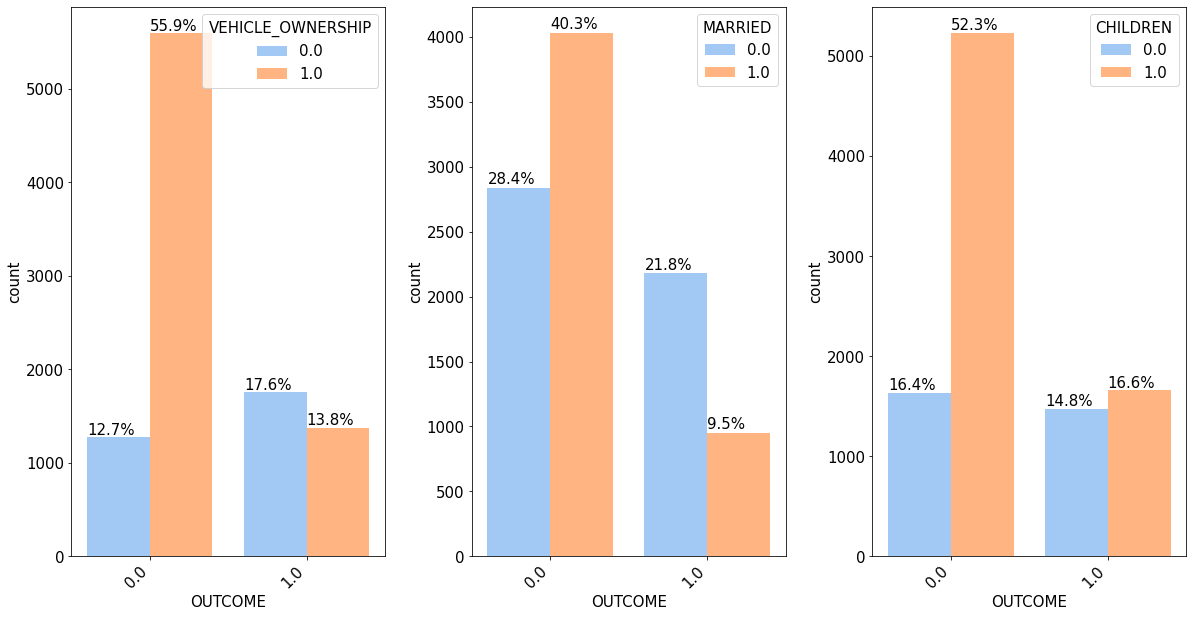

In [28]:
countplot_with_target(data, bin_num_cols, 3)

In [29]:
data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


### Handling Categorical Data


1. Nominal Data -> OneHot Encoding is used as the data are not in Order.
2. Ordinal Data -> Label Encoding is used as the data is in Order.

In [35]:
# Label Encoding is used as the data is in order

data.replace({"16-25" : 0, "26-39" : 1, "40-64" : 2, "65+" : 3}, inplace = True)
data.replace({"0-9y" : 0, "10-19y" : 1, "20-29y" : 2, "30y+" : 3}, inplace = True)
data.replace({"none" : 0, "high school" : 1, "university" : 2}, inplace = True)
data.replace({"poverty" : 0, "working class" : 1, "middle class" : 2, "upper class" : 2 }, inplace = True)

In [36]:
data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,female,majority,0,1,2,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,0,male,majority,0,0,0,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,0,female,majority,0,1,1,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,0,male,majority,0,2,1,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,1,male,majority,1,0,1,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [38]:
#One Hot Encoding

Gender = data[["GENDER"]]
Gender = pd.get_dummies(Gender, drop_first= True)

Race = data[["RACE"]]
Race = pd.get_dummies(Race, drop_first= True)

Vehicle_year = data[["VEHICLE_YEAR"]]
Vehicle_year = pd.get_dummies(Vehicle_year, drop_first= True)

Vehicle_type = data[["VEHICLE_TYPE"]]
Vehicle_type = pd.get_dummies(Vehicle_type, drop_first= True)

data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,female,majority,0,1,2,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,0,male,majority,0,0,0,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,0,female,majority,0,1,1,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,0,male,majority,0,2,1,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,1,male,majority,1,0,1,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [39]:
data.drop(["GENDER", "RACE", "VEHICLE_YEAR", "VEHICLE_TYPE"], axis = 1, inplace = True)

In [41]:
data = pd.concat([data, Gender, Race, Vehicle_year, Vehicle_type], axis = 1)
data.head()

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER_male,RACE_minority,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,3,0,1,2,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,0.0,0,0,0,0
1,0,0,0,0,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,1.0,1,0,1,0
2,0,0,1,1,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,0.0,0,0,1,0
3,0,0,2,1,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,0.0,1,0,1,0
4,1,1,0,1,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,1.0,1,0,1,0


OUTCOME                     1.000000
DRIVING_EXPERIENCE          0.497431
AGE                         0.448463
INCOME                      0.406605
VEHICLE_OWNERSHIP           0.378921
PAST_ACCIDENTS              0.311495
CREDIT_SCORE                0.309010
VEHICLE_YEAR_before 2015    0.294178
SPEEDING_VIOLATIONS         0.291862
MARRIED                     0.262104
CHILDREN                    0.232835
EDUCATION                   0.189357
DUIS                        0.189352
ANNUAL_MILEAGE              0.177575
GENDER_male                 0.107208
POSTAL_CODE                 0.095889
RACE_minority               0.008280
VEHICLE_TYPE_sports car     0.005620
Name: OUTCOME, dtype: float64

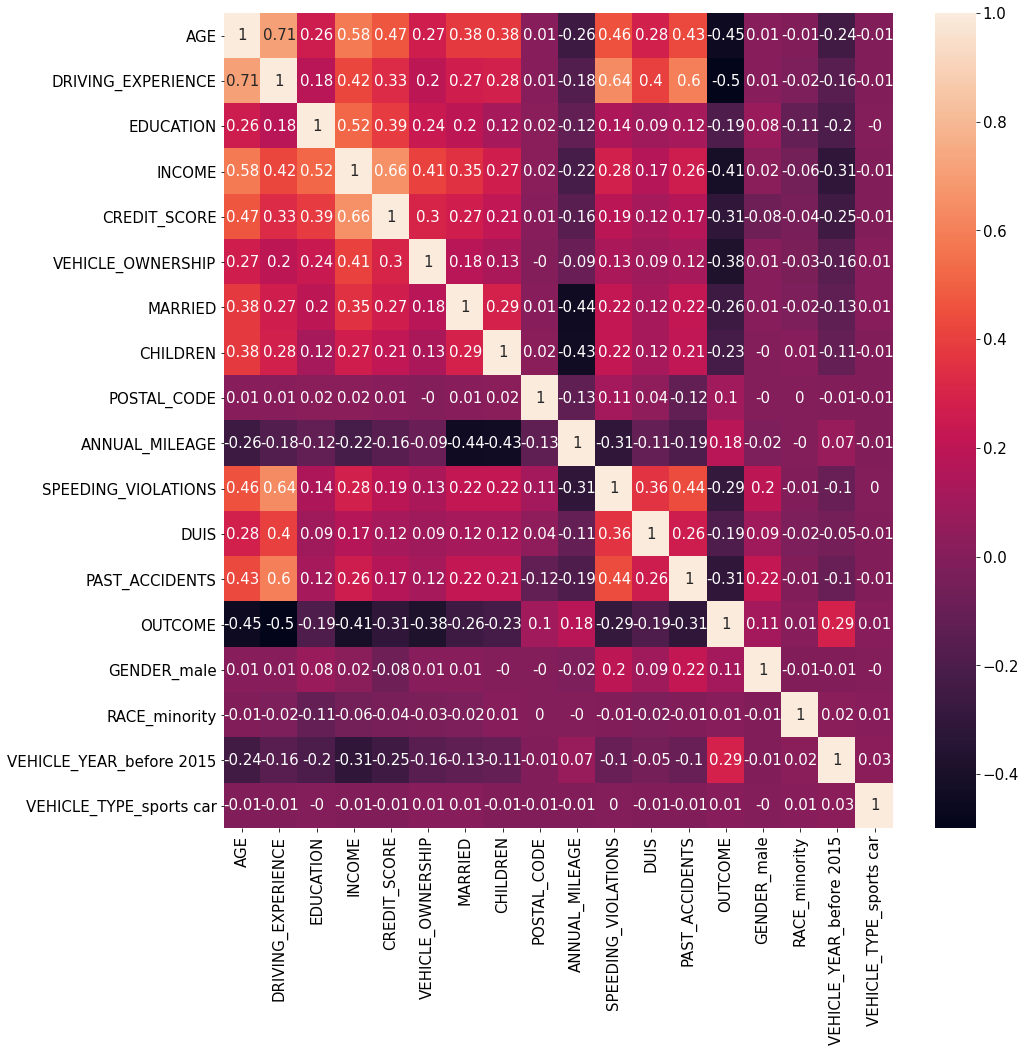

In [43]:
def corr(data,target_variable):

    fig, ax = plt.subplots(figsize=(15,15))
    correlation_matrix = data.corr().round(2)
    sns.heatmap(data = correlation_matrix, annot=True)
    
    correlation = data.corr()[target_variable].abs().sort_values(ascending = False)
    return correlation
    
corr(data,"OUTCOME")

1. Looking at the heatmap, it shows maximum of the features are independent.
2. Race and Vehicle Year are least co-related with Target variable and hence these variables can be dropped.

In [47]:
data = data.drop(["RACE_minority", "VEHICLE_TYPE_sports car"], axis = 1)
data.head()

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER_male,VEHICLE_YEAR_before 2015
0,3,0,1,2,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,0.0,0,0
1,0,0,0,0,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,1.0,1,1
2,0,0,1,1,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,0.0,0,1
3,0,0,2,1,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,0.0,1,1
4,1,1,0,1,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,1.0,1,1


#### Building the Model

1. Seperating the target variable.
2. Creating Training and Testing dataframe.
3. Selecting various algorithms and check the accuracy of the model.
4. Check the accracy and error with proper techniques.

In [48]:
# Separating target feature from the dataset. 
y = data['OUTCOME']
X = data.drop(columns=['OUTCOME'], axis=1)

In [68]:
X

,AGE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,GENDER_male,VEHICLE_YEAR_before 2015
0,3,0,1,2,0.629027,1.0,0.0,1.0,10238,12000.000000,0,0,0,0,0
1,0,0,0,0,0.357757,0.0,0.0,0.0,10238,16000.000000,0,0,0,1,1
2,0,0,1,1,0.493146,1.0,0.0,0.0,10238,11000.000000,0,0,0,0,1
3,0,0,2,1,0.206013,1.0,0.0,1.0,32765,11000.000000,0,0,0,1,1
4,1,1,0,1,0.388366,1.0,0.0,0.0,32765,12000.000000,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,2,2,0.582787,1.0,0.0,0.0,10238,16000.000000,0,0,1,0,1
9996,1,1,0,2,0.522231,1.0,0.0,1.0,32765,11697.003207,1,0,0,0,0
9997,1,0,1,2,0.470940,1.0,0.0,1.0,10238,14000.000000,0,0,0,1,1
9998,1,1,1,0,0.364185,0.0,0.0,1.0,10238,13000.000000,2,0,1,0,1


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 21)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [54]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [55]:
#Predicting on the Test Data.
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


[[1259  122]
 [ 193  426]]


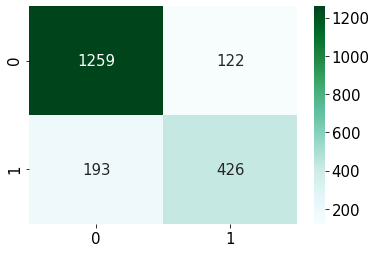

In [56]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot = True, cmap = "BuGn" , fmt='g')
print(confusion_matrix)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1381
         1.0       0.78      0.69      0.73       619

    accuracy                           0.84      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.84      0.84      0.84      2000



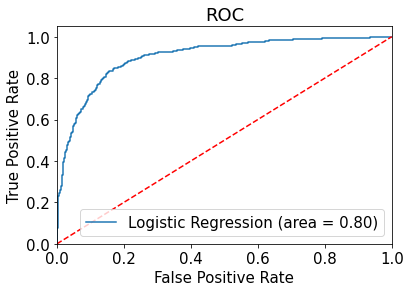

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Feature: 0, Score: -0.01822
Feature: 1, Score: -1.73252
Feature: 2, Score: 0.03468
Feature: 3, Score: -0.03137
Feature: 4, Score: -0.00925
Feature: 5, Score: -0.76987
Feature: 6, Score: -0.23163
Feature: 7, Score: -0.07503
Feature: 8, Score: 0.41068
Feature: 9, Score: 0.16691
Feature: 10, Score: 0.15004
Feature: 11, Score: 0.03983
Feature: 12, Score: -0.24826
Feature: 13, Score: 0.45920
Feature: 14, Score: 0.79840


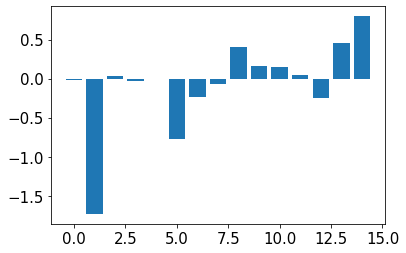

In [64]:
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25)

In [91]:
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

In [92]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.832


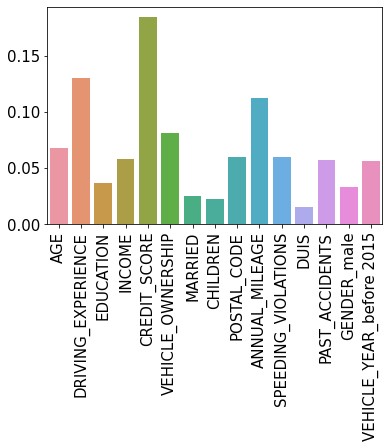

In [93]:
#Feature Importance
importances = rf.feature_importances_
plot = sns.barplot(x = X.columns, y=importances)

[[1253  128]
 [ 208  411]]


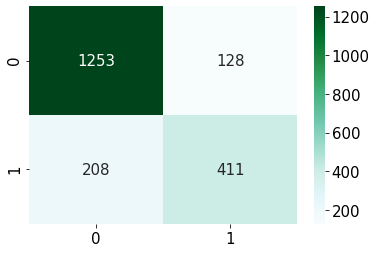

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot = True, cmap = "BuGn" , fmt='g')
print(confusion_matrix)

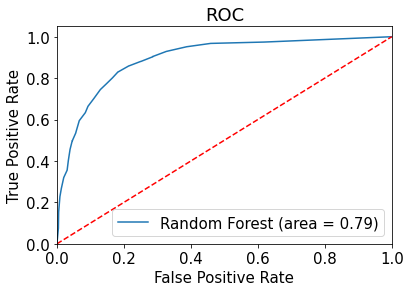

In [96]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier

In [111]:
clf = DecisionTreeClassifier(max_depth=15,random_state=21)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [112]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.819


[[1212  169]
 [ 193  426]]


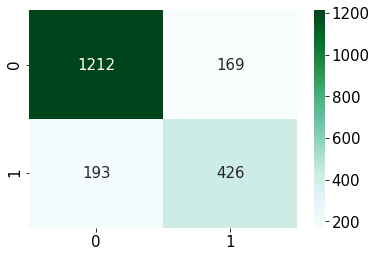

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot = True, cmap = "BuGn" , fmt='g')
print(confusion_matrix)

In [104]:
#Feature Importance
importances = dt.feature_importances_
plot = sns.barplot(x = X.columns, y=importances)

AttributeError: 'bool' object has no attribute 'all'